In [36]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


#TRAINING DATA----------------------------------------------------------------------------------
df=pd.read_csv('training.csv')
#df = df[df.topic != 'IRRELEVANT']

#get rid of commas/punctuation
punctuation_signs = list("?:!.,;")
df['article_words_parse_1'] = df['article_words']

for punct_sign in punctuation_signs:
    df['article_words_parse_1'] = df['article_words_parse_1'].str.replace(punct_sign, ' ')
    
#all lower case
df['article_words_parse_2'] = df['article_words_parse_1'].str.lower()

#NO STEMMING NO LEMMISATION, NO STOP WORDS

#Category Numbers
category_codes = {
    'ARTS CULTURE ENTERTAINMENT': 0,
    'BIOGRAPHIES PERSONALITIES PEOPLE': 1,
    'DEFENCE': 2,
    'DOMESTIC MARKETS': 3,
    'FOREX MARKETS': 4,
    'HEALTH': 5,
    'IRRELEVANT': 6,
    'MONEY MARKETS': 7,
    'SCIENCE AND TECHNOLOGY': 8,
    'SHARE LISTINGS': 9,
    'SPORTS': 10
}

# Category mapping
df['Category_Code'] = df['topic']
df = df.replace({'Category_Code':category_codes})

X_train, X_test, y_train, y_test = train_test_split(df['article_words_parse_2'], 
                                                    df['Category_Code'], 
                                                    test_size=0.1, 
                                                    random_state=8)

#count how many of each topic
print("Samples per class (training): {}".format(np.bincount(y_train)))
print("Samples per class (testing): {}".format(np.bincount(y_test)))

print("Number of documents in train data: {}".format(len(X_train)))
print("Number of documents in test data: {}".format(len(X_test)))

Samples per class (training): [ 105  155  233  124  743  159 4251 1524   63  205  988]
Samples per class (testing): [ 12  12  25   9 102  24 483 149   7  13 114]
Number of documents in train data: 8550
Number of documents in test data: 950


In [50]:
#TFIDF
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 6000


tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(8550, 6000)
(950, 6000)


The training accuracy is: 
0.7755555555555556
The test accuracy is: 
0.74
Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       1.00      0.08      0.15        12
           2       0.77      0.40      0.53        25
           3       0.00      0.00      0.00         9
           4       0.55      0.17      0.26       102
           5       0.67      0.08      0.15        24
           6       0.80      0.89      0.85       483
           7       0.54      0.87      0.67       149
           8       1.00      0.29      0.44         7
           9       1.00      0.08      0.14        13
          10       0.89      0.96      0.92       114

    accuracy                           0.74       950
   macro avg       0.66      0.35      0.37       950
weighted avg       0.73      0.74      0.70       950



C:\Users\Stephen Sung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


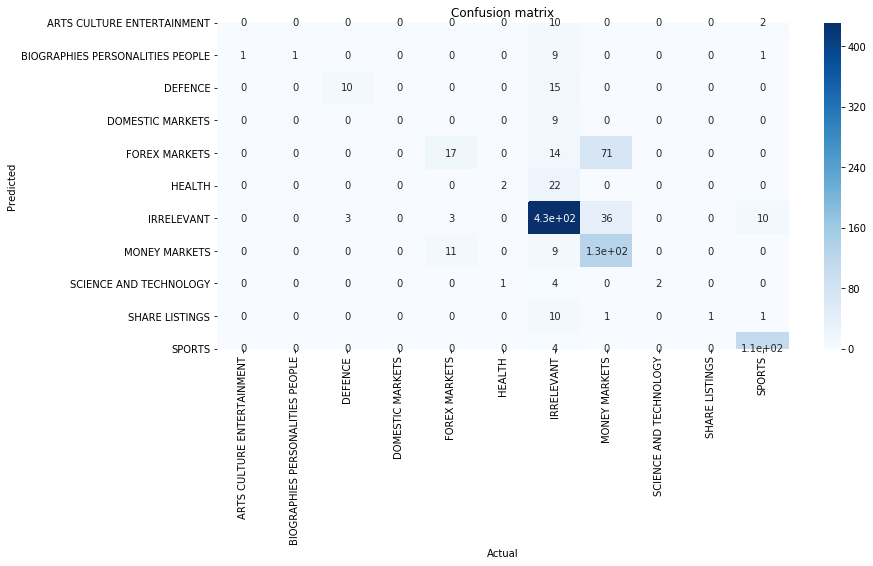

In [51]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#MNB
mnbc = MultinomialNB()
mnbc

mnbc.fit(features_train, labels_train)
mnbc_pred = mnbc.predict(features_test)

print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))

print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

print("Classification report")
print(classification_report(labels_test,mnbc_pred))

aux_df = df[['topic', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['topic'].values, 
            yticklabels=aux_df['topic'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()